# **Does Personality Has a Role In Physical Pain?**

## **Introduction**


### *Background*
Occupational back pain is a disorder that commonly affects the working population, resulting in disability, health-care utilization, and a heavy socioeconomic burden. Although the etiology of occupational pain remains largely unsolved, anecdotal evidence exists for the contribution of personality and posture to long-term pain management, pointing to a direct contribution of the mind-body axis. In the current study, we have conducted an extensive evaluation into the relationships between posture and personality.

### *About the Dataset*
The results from the personality inventory (MBTI) came in the form of a combination of letters [Extraversion, Introversion, Sensing, Intuition, Thinking, Feeling, Judging, and Perceiving], and numbers, 1–26.

The pain scale data consisted of a number between 0(low) to 10 (high).

Posture - ideal posture (A), kyphosis-lordosis (B), flat back (C), sway-back (D)

### *Hypothesis*
We hypothesize that the personality type of the participants will have a significant effect on the pain scale data. As it is established that there is a highly positive correlation between personality and the posture, hence we expect the posture to have a significant effect on the pain scale data as well.

### *Research Questions*
1. Does the personality type of the participants have a significant effect on the pain scale data?
2. Does the posture of the participants have a significant effect on the pain scale data?
3. Does Activity have a significant effect on the pain scale data?
4. Is there an interaction between Activity and Posture?
5. IS there any correlation between Activity and Personality?
6. Is it true that with age the pain scale data increases?
7. Does hieght have any effect on the pain scale data or posture?
8. Does obese people have a higher pain scale data?

## **Exploratory Data Analysis(EDA)**

### *Importing Libraries*

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score



### *Reading Dataset*

In [4]:
df = pd.read_csv('/workspaces/work_repo/Myers Briggs Table_S1.csv')
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


- At first glance, we can see that we don't need the 'S NO' column, so we can drop it.

### *Checking Shape of Dataset*

In [5]:
df.shape

(97, 20)

- There are 97 rows and 20 columns in the dataset.

### *Checking information of Dataset*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S No            97 non-null     int64  
 1   AGE             97 non-null     int64  
 2   HEIGHT          97 non-null     int64  
 3   WEIGHT          97 non-null     int64  
 4   SEX             97 non-null     object 
 5   ACTIVITY LEVEL  97 non-null     object 
 6   PAIN 1          97 non-null     float64
 7   PAIN 2          97 non-null     float64
 8   PAIN 3          97 non-null     float64
 9   PAIN 4          97 non-null     float64
 10  MBTI            97 non-null     object 
 11  E               97 non-null     int64  
 12  I               97 non-null     int64  
 13  S               97 non-null     int64  
 14  N               97 non-null     int64  
 15  T               97 non-null     int64  
 16  F               97 non-null     int64  
 17  J               97 non-null     int64

- There are 4 categorical columns and 16 numerical columns in the dataset.

### *Checking for Null Values*

In [7]:
df.isnull().sum()

S No              0
AGE               0
HEIGHT            0
WEIGHT            0
SEX               0
ACTIVITY LEVEL    0
PAIN 1            0
PAIN 2            0
PAIN 3            0
PAIN 4            0
MBTI              0
E                 0
I                 0
S                 0
N                 0
T                 0
F                 0
J                 0
P                 0
POSTURE           0
dtype: int64

- There are no null values in the dataset.

### *Droping unwanted columns*

In [8]:
df.drop(['S No'], axis=1, inplace=True)
df.shape


(97, 19)

### *Describing the dataset*

In [9]:
df.describe()

,AGE,HEIGHT,WEIGHT,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P
count,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,43.855670,65.731959,159.43299,2.139175,3.747423,1.943299,2.530928,12.690722,8.288660,15.134021,11.041237,10.505155,13.443299,10.319588,11.680412
std,16.776093,3.737522,36.19591,2.572635,3.191071,2.587909,3.111483,5.717956,5.697146,4.833970,4.732242,5.332924,5.297344,5.727395,5.711003
min,11.000000,58.000000,68.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,0.000000,2.000000,0.000000,2.000000
25%,30.000000,63.000000,135.00000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,12.000000,7.000000,6.000000,10.000000,5.000000,6.000000
50%,45.000000,66.000000,157.00000,1.000000,3.000000,0.500000,0.000000,13.000000,8.000000,15.000000,11.000000,11.000000,13.000000,11.000000,11.000000
75%,56.000000,68.000000,183.00000,4.000000,7.000000,3.500000,5.000000,18.000000,13.000000,19.000000,14.000000,14.000000,18.000000,16.000000,17.000000
max,82.000000,74.000000,263.00000,9.500000,10.000000,10.000000,10.000000,21.000000,19.000000,25.000000,21.000000,22.000000,24.000000,20.000000,22.000000


### *Grouping data set by MBTI and comparing it with the rest of data*

In [10]:
df.groupby('MBTI').mean()

,AGE,HEIGHT,WEIGHT,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P
MBTI,,,,,,,,,,,,,,,
ENFJ,33.000000,66.200000,163.200000,2.800000,5.200000,2.800000,3.400000,16.800000,4.200000,11.200000,14.400000,5.800000,18.000000,15.200000,6.800000
ENFP,42.600000,65.000000,159.000000,2.200000,2.000000,1.500000,1.200000,17.600000,3.400000,8.800000,17.200000,5.500000,18.500000,3.500000,18.500000
ENTJ,36.200000,67.800000,164.000000,1.100000,4.300000,1.700000,1.500000,17.200000,3.800000,10.400000,15.600000,12.600000,11.400000,15.400000,6.600000
ENTP,47.800000,65.600000,194.600000,1.800000,3.700000,0.600000,4.400000,16.600000,4.400000,9.200000,16.800000,17.600000,6.400000,6.400000,15.400000
ESFJ,45.727273,64.909091,156.636364,2.363636,2.590909,1.954545,3.636364,15.000000,6.000000,17.909091,9.909091,8.000000,15.818182,14.909091,7.090909
ESFP,40.583333,64.916667,154.500000,2.333333,3.916667,1.125000,1.833333,16.083333,4.916667,17.000000,8.916667,7.083333,16.750000,5.916667,16.083333
ESTJ,55.285714,65.714286,165.142857,1.714286,3.428571,2.928571,4.785714,14.285714,6.714286,17.428571,8.571429,14.428571,9.571429,16.428571,5.571429
ESTP,39.800000,67.100000,163.200000,1.200000,3.200000,1.700000,2.850000,16.200000,4.800000,19.100000,6.900000,16.100000,7.900000,6.800000,15.200000
INFJ,36.250000,65.750000,136.500000,2.500000,4.875000,5.000000,2.750000,5.250000,15.250000,13.750000,12.250000,8.000000,16.000000,15.250000,6.750000


## **Data Visualization**

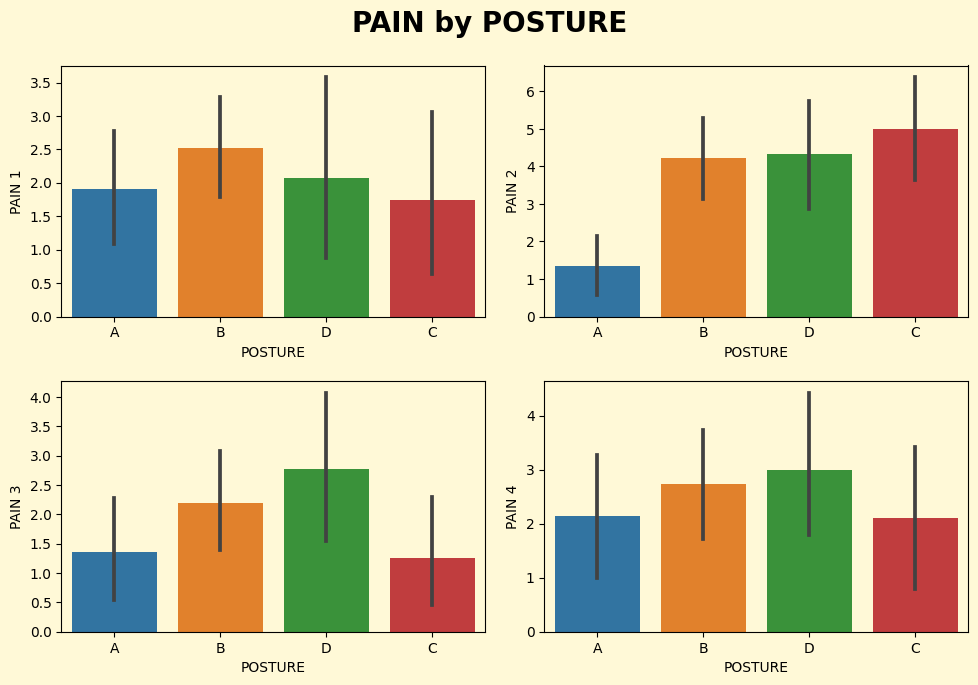

In [11]:
#subplot foor each PAIN
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
for idx, pain in enumerate(['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']):
    row, col = idx // 2, idx % 2
    sns.barplot(x='POSTURE', y=pain, data=df, ax=axes[row][col])
    ## add  1 title at top
   
    fig.suptitle('PAIN by POSTURE', fontsize=20, fontweight='bold',color='xkcd:black')
     ## remove padding of title
    fig.tight_layout(pad=1.5)

    #set background color
    fig.patch.set_facecolor('#FFF9D7')
    #set background color of subplots
    axes[row][col].set_facecolor('#FFF9D7')



    

- There is a significant difference in the pain scale data of the participants with different posture types.
- As we have established a direct relationship between the personality type and the posture, hence we can say that the personality type of the participants has a significant effect on the pain scale data.

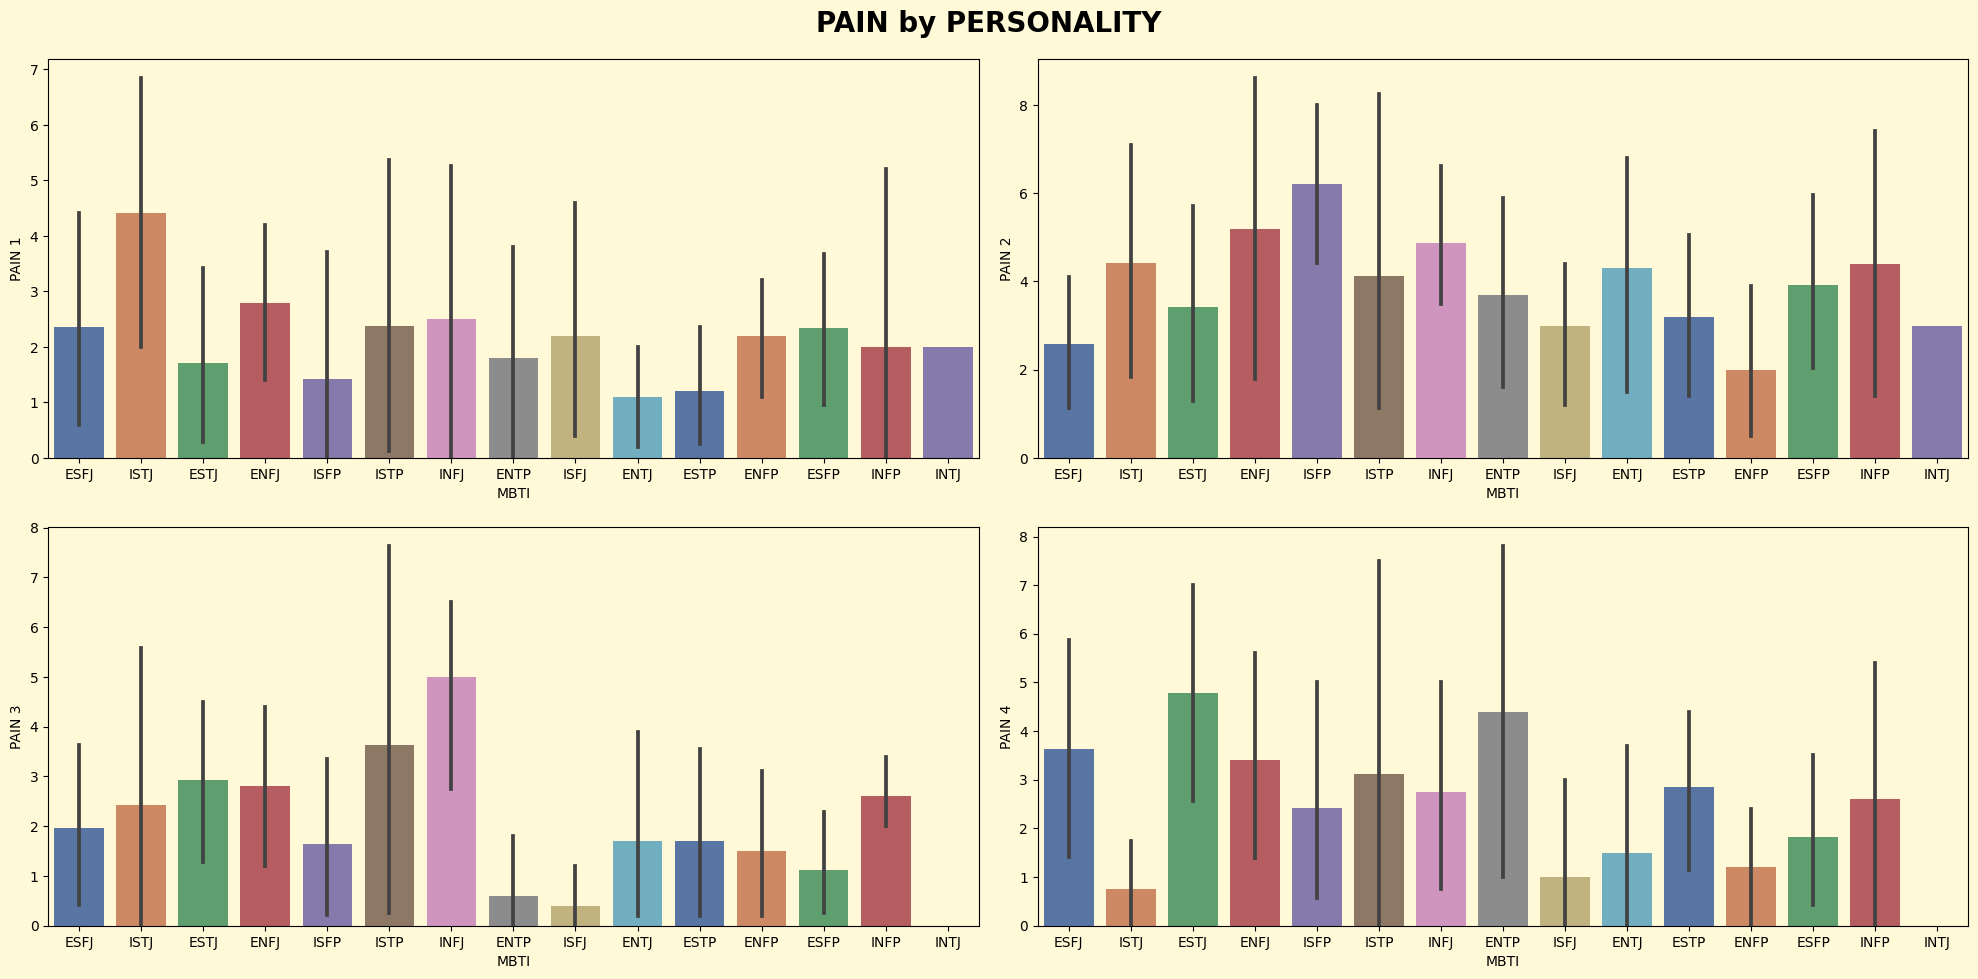

In [12]:
#subplot foor each PAIN
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for idx, pain in enumerate(['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']):
    row, col = idx // 2, idx % 2
    sns.barplot(x='MBTI', y=pain, data=df, ax=axes[row][col],palette="deep")
    fig.suptitle('PAIN by PERSONALITY', fontsize=20, fontweight='bold',color='xkcd:black')
    fig.tight_layout(pad=1.5)
    fig.patch.set_facecolor('#FFF9D7')
    axes[row][col].set_facecolor('#FFF9D7')

- Although we have already scene in the previous grapgh that there is a significant difference in pain scale of participants with different posture (hence personality), but here we visualize the pain difference between personalities to reconfirm our hypothesis.

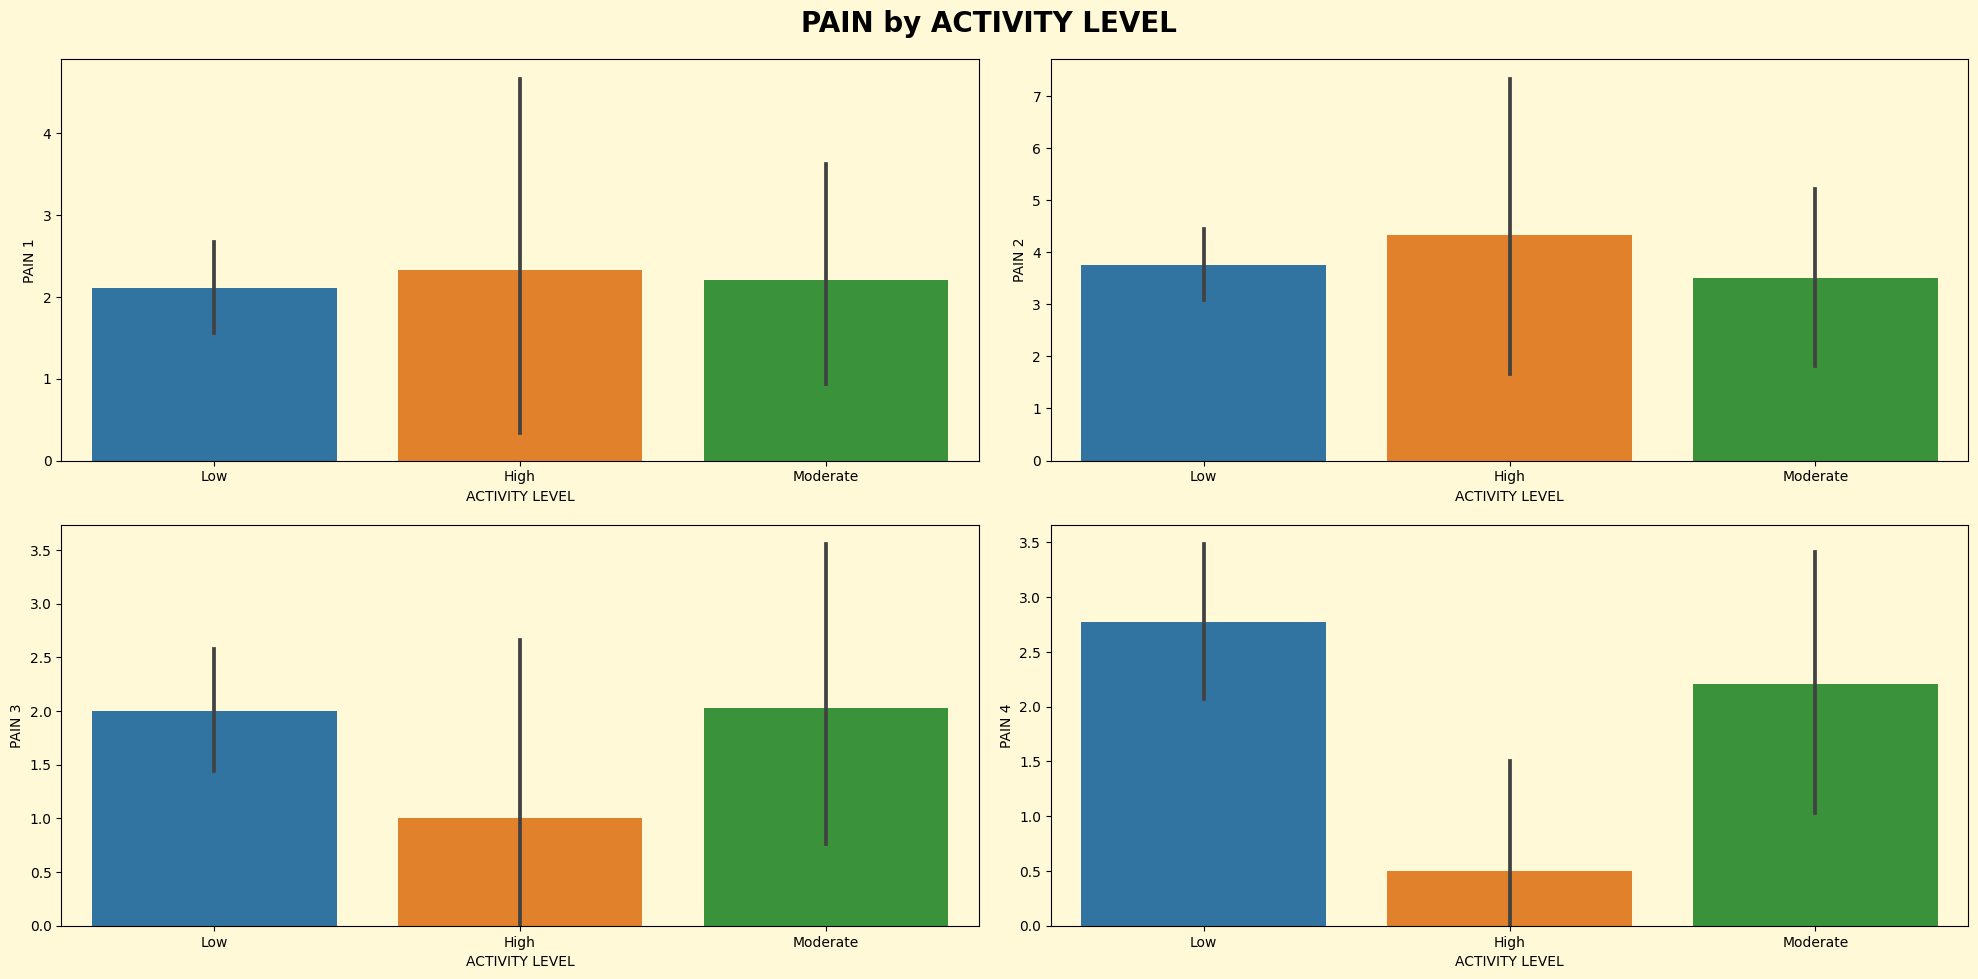

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for idx, pain in enumerate(['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']):
    row, col = idx // 2, idx % 2
    sns.barplot(x='ACTIVITY LEVEL', y=pain, data=df, ax=axes[row][col])
    fig.suptitle('PAIN by ACTIVITY LEVEL', fontsize=20, fontweight='bold',color='xkcd:black')
    fig.tight_layout(pad=1.5)
    fig.patch.set_facecolor('#FFF9D7')
    axes[row][col].set_facecolor('#FFF9D7')

- There is no clear relationship between activity level of the participants and the pain scale data.

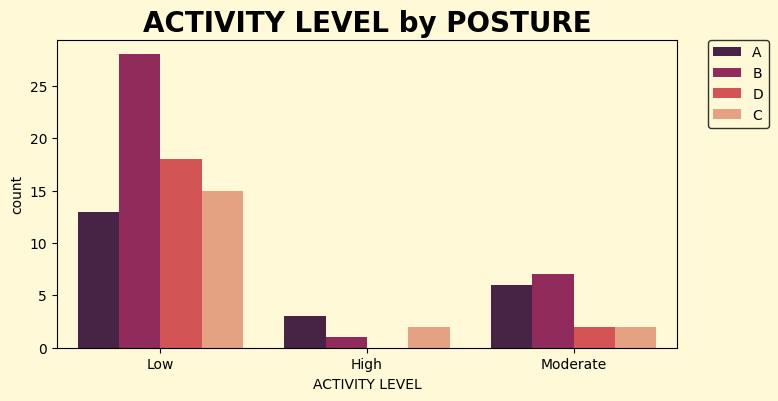

In [14]:
plt.figure(figsize=(8,4),facecolor='#FFF9D7')
sns.countplot(x='ACTIVITY LEVEL', data=df, hue='POSTURE', palette='rocket')
plt.title('ACTIVITY LEVEL by POSTURE', fontsize=20, fontweight='bold',color='xkcd:black')
plt.gca().set_facecolor('#FFF9D7')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,facecolor='#FFF9D7',edgecolor='black')

- Despite having high or moderate activity level the participants with kyphosis-lordosis posture have a higher pain scale data.
- So there is no clear relationship between activity level and posture of the participants.

Text(0.5, 1.0, 'ACTIVITY VS PERSONALITY')

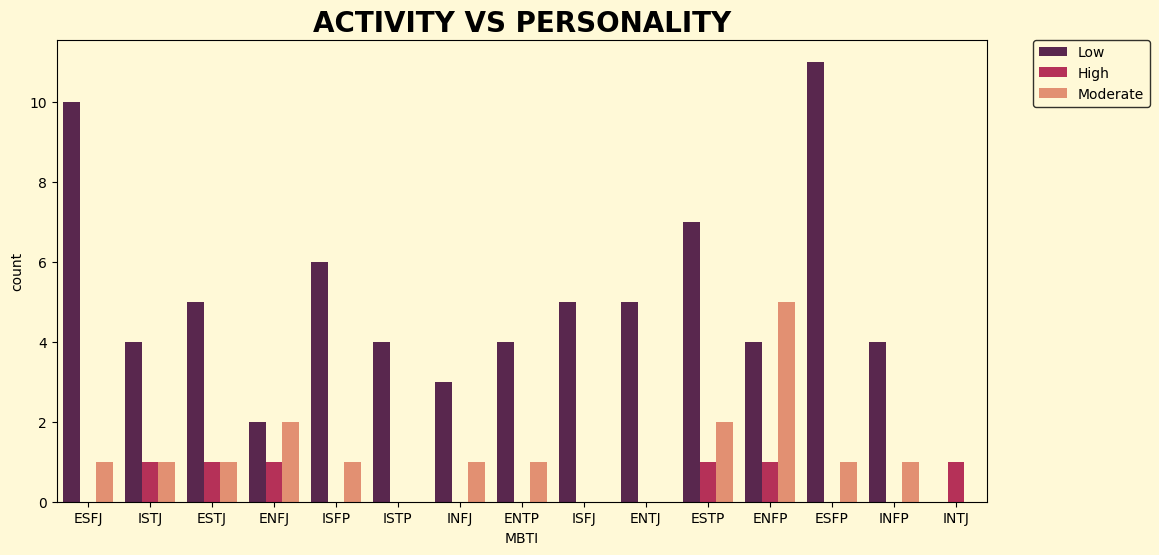

In [15]:
plt.figure(figsize=(12,6),facecolor='#FFF9D7')
sns.countplot(x='MBTI', data=df, hue='ACTIVITY LEVEL', palette='rocket')
plt.gca().set_facecolor('#FFF9D7')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,facecolor='#FFF9D7',edgecolor='black')
plt.title('ACTIVITY VS PERSONALITY', fontsize=20, fontweight='bold',color='xkcd:black')

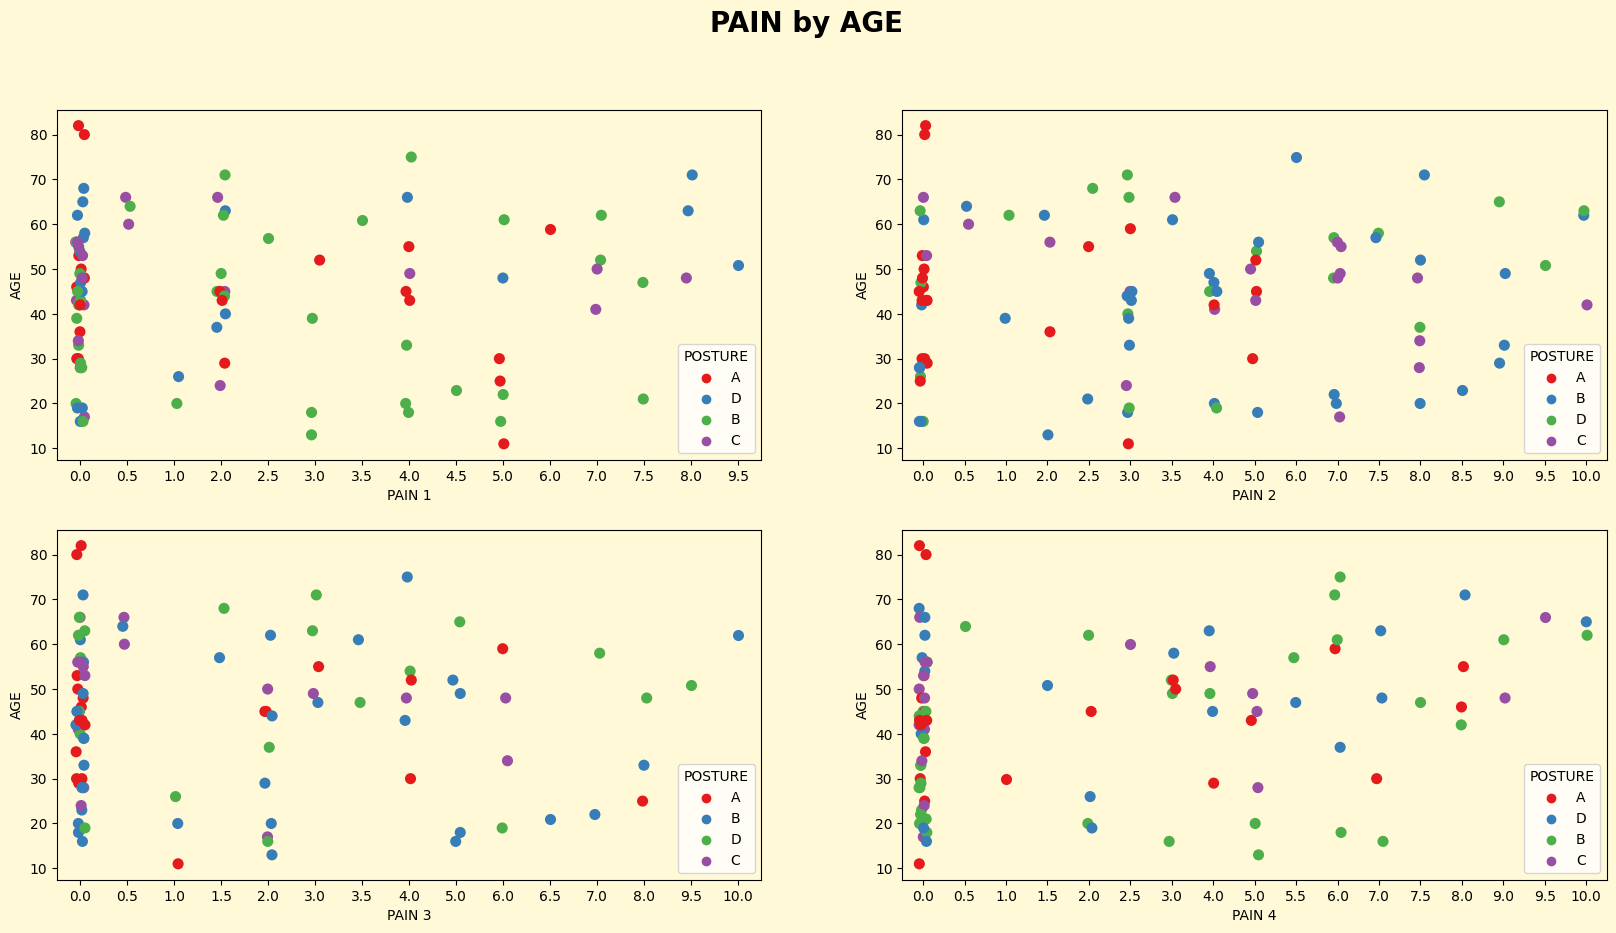

In [16]:
#stirplot for all PAIN and age
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for idx, pain in enumerate(['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']):
    row, col = idx // 2, idx % 2
    sns.stripplot(x=pain, y='AGE', data=df, hue='POSTURE', palette='Set1', jitter=True, ax=axes[row][col],size=8)
    fig.suptitle('PAIN by AGE', fontsize=20, fontweight='bold',color='xkcd:black')
    fig.patch.set_facecolor('#FFF9D7')
    axes[row][col].set_facecolor('#FFF9D7')

- A common phrase is that with age the pain increases, but here we can see that there is no clear relationship between age and the pain scale data.

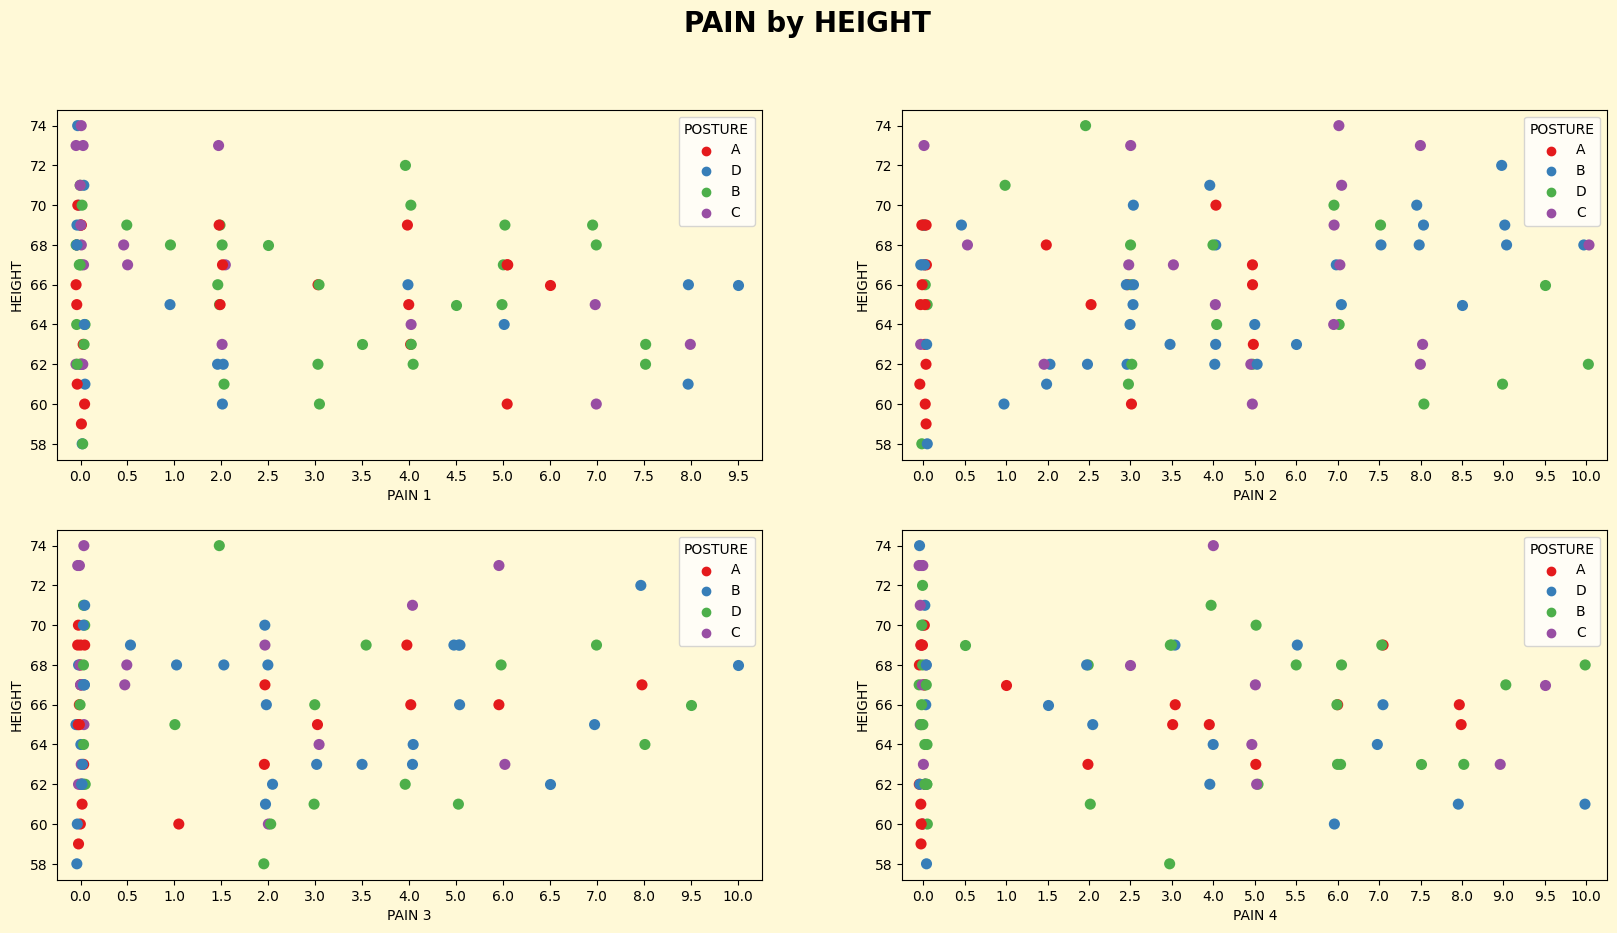

In [17]:
#stirplot for all PAIN and age
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for idx, pain in enumerate(['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']):
    row, col = idx // 2, idx % 2
    sns.stripplot(x=pain, y='HEIGHT', data=df, hue='POSTURE', palette='Set1', jitter=True, ax=axes[row][col],size=8)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # tittle
    fig.suptitle('PAIN by HEIGHT', fontsize=20, fontweight='bold',color='xkcd:black')
    fig.patch.set_facecolor('#FFF9D7')
    axes[row][col].set_facecolor('#FFF9D7')
    

- Also another common misconception is that highted people have a higher pain scale data, but here we can see that there is no clear relationship between weight and the pain scale data.

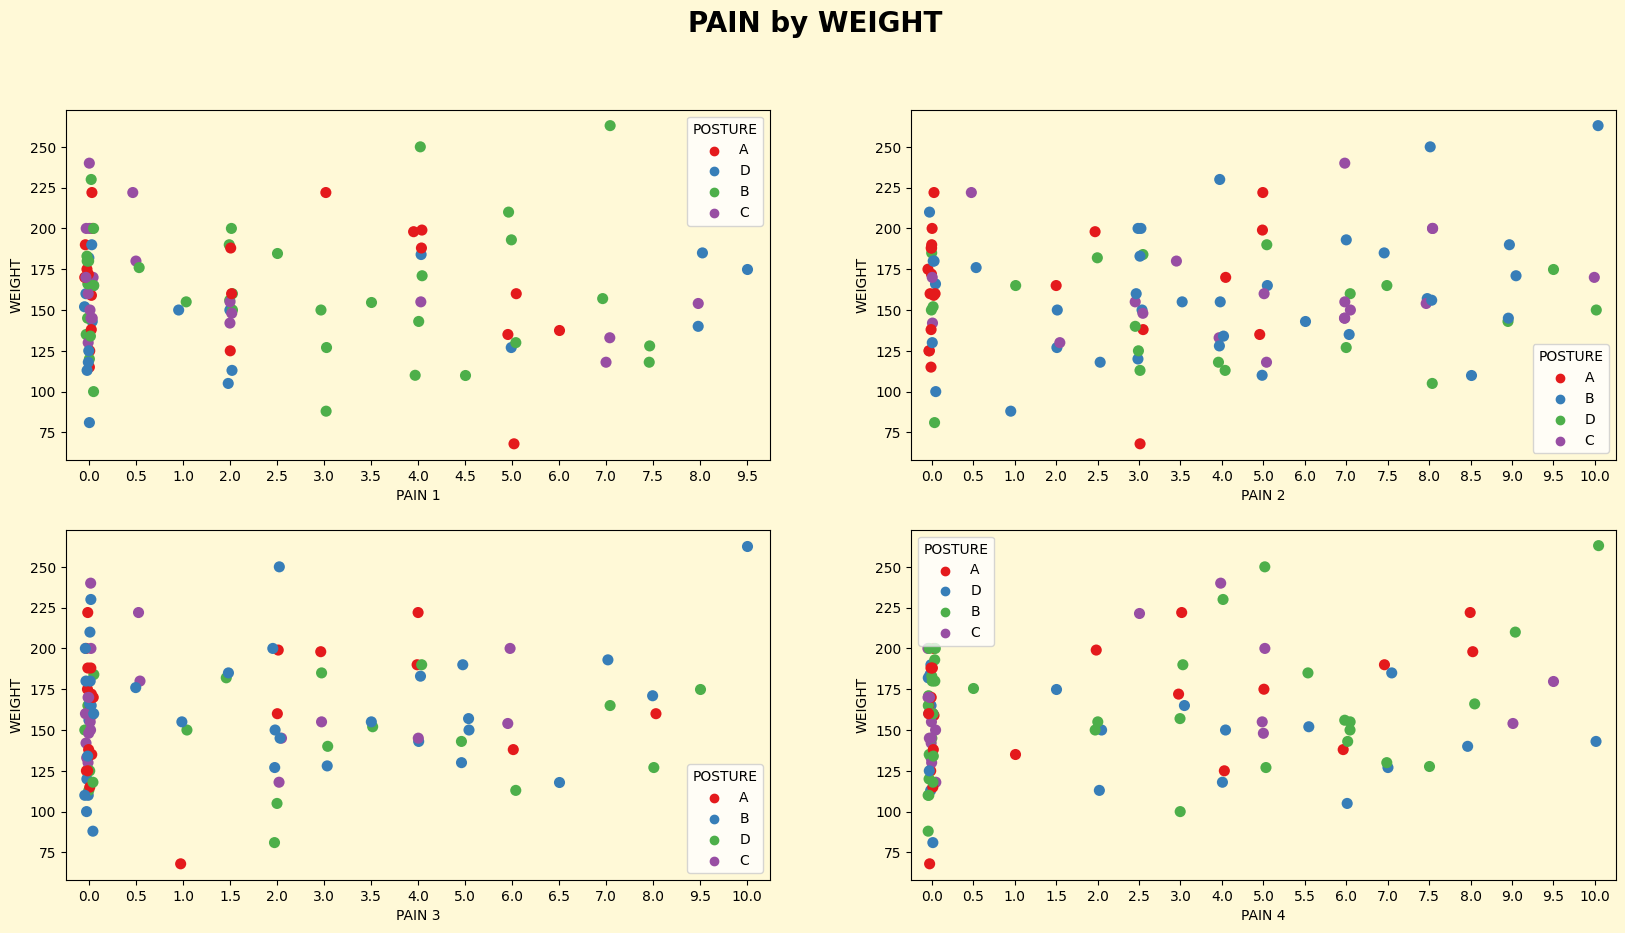

In [18]:
#stirplot for all PAIN and age
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for idx, pain in enumerate(['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']):
    row, col = idx // 2, idx % 2
    sns.stripplot(x=pain, y='WEIGHT', data=df, hue='POSTURE', palette='Set1', jitter=True, ax=axes[row][col],size=8)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # tittle
    fig.suptitle('PAIN by WEIGHT', fontsize=20, fontweight='bold',color='xkcd:black')
    fig.patch.set_facecolor('#FFF9D7')
    axes[row][col].set_facecolor('#FFF9D7')
    

- Also another common misconception is that obese people have a higher pain scale data, but here we can see that there is no clear relationship between weight and the pain scale data.

## **Conclusion**
- The hypothesis that the personality type of the participants will have a significant effect on the pain scale data is true.
- It is safe to say that people who have common back pain disorder have a different personality type than the rest of the population.
- This pain can be managed by thoroughly studying the personality type of the patient and then prescribing the right treatment.
- As we have determined that introverts are more prone to back pain, hence we can say that the introverts should be more careful about their posture and should take care of their back.
- Physical aspects such as Age, Height, and Obesity does not have a significant effect on common back pain disorder.

## **Machine Learning**

### *Droping unwanted columns*

In [19]:
## copying data set and droping unwanted columns
df1 = df.copy()
df1.drop(['AGE','HEIGHT','WEIGHT','ACTIVITY LEVEL',],axis=1,inplace=True)
df1.head()

,SEX,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,Female,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,Male,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,Male,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,Male,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,Female,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


### *Label Encoding*


In [20]:
## Label Encoding
le = LabelEncoder()
df1['SEX'] = le.fit_transform(df1['SEX'])
df1.head()

,SEX,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,0,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,1,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,1,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,1,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,0,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


### *Data Augmentation*

In [21]:
E=np.std(df1['E'])
I=np.std(df1['I'])
N=np.std(df1['N'])
S=np.std(df1['S'])
T=np.std(df1['T'])
F=np.std(df1['F'])
J=np.std(df1['J'])
P=np.std(df1['P'])

In [22]:
dataset_b=[]
for _,row in df1.iterrows():
        temp={
            'E':row['E'],
            'I':row['I'],
            'N':row['N'],
            'S':row['S'],
            'T':row['T'],
            'F':row['F'],
            'J':row['J'],
            'P':row['P'],
            'MBTI':row['MBTI'],
            'POSTURE':row['POSTURE']
            }
        dataset_b.append(temp)
for _ in range(200):
    for _,row in df1.iterrows():
        temp={
                'E':row['E']+np.random.normal(E),
                'I':row['I']+np.random.normal(I),
                'N':row['N']+np.random.normal(N),
                'S':row['S']+np.random.normal(S),
                'T':row['T']+np.random.normal(T),
                'F':row['F']+np.random.normal(F),
                'J':row['J']+np.random.normal(J),
                'P':row['P']+np.random.normal(P),
                'MBTI':row['MBTI'],
                'POSTURE':row['POSTURE']
                }
        dataset_b.append(temp)
df2=pd.DataFrame(dataset_b)
df2.head()

,E,I,N,S,T,F,J,P,MBTI,POSTURE
0,18.0,3.0,9.0,17.0,9.0,13.0,18.0,4.0,ESFJ,A
1,6.0,15.0,12.0,14.0,21.0,3.0,13.0,9.0,ISTJ,B
2,15.0,6.0,10.0,16.0,15.0,9.0,12.0,10.0,ESTJ,A
3,6.0,15.0,5.0,21.0,13.0,11.0,19.0,3.0,ISTJ,D
4,14.0,7.0,6.0,20.0,9.0,15.0,16.0,6.0,ENFJ,A


### *Splitting the dataset into the Training set and Test set*

In [23]:
Xc = df2[['E','I','N','S','T','F','J','P']]
yc = df2['MBTI']

In [24]:
Xc_train,Xc_test,yc_train,yc_test = train_test_split(Xc,yc,test_size=0.2,random_state=0)

### *Model Building*

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(Xc_train,yc_train)
rf.predict(Xc_test)
rf.score(Xc_test,yc_test)

0.9805128205128205

### *Comparing with original data*

In [27]:
x_orignal = df1[['E','I','N','S','T','F','J','P']]
y_orignal = df1['MBTI']

In [28]:
## splitting data into train and test
x_orignal_train,x_orignal_test,y_orignal_train,y_orignal_test = train_test_split(x_orignal,y_orignal,test_size=0.2,random_state= 0)

In [29]:
rf.score(x_orignal_test,y_orignal_test)

0.95

In [30]:
## cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = Xc_train, y = yc_train, cv = 10)
accuracies.mean()

0.9803168122234831

In [31]:
##cross validation on original data
accuracies = cross_val_score(estimator = rf, X = x_orignal_train, y = y_orignal_train, cv = 10)
accuracies.mean()

0.8464285714285713

In [32]:
accuracies = cross_val_score(estimator = rf, X = x_orignal, y = y_orignal, cv = 10)
accuracies.mean()

0.8955555555555555

In [33]:
##import pickle
import pickle
pickle.dump(rf,open(f'{rf.__class__.__name__}.pkl','wb'))